In [2]:
import networkx as nx
import matplotlib.pyplot as plt

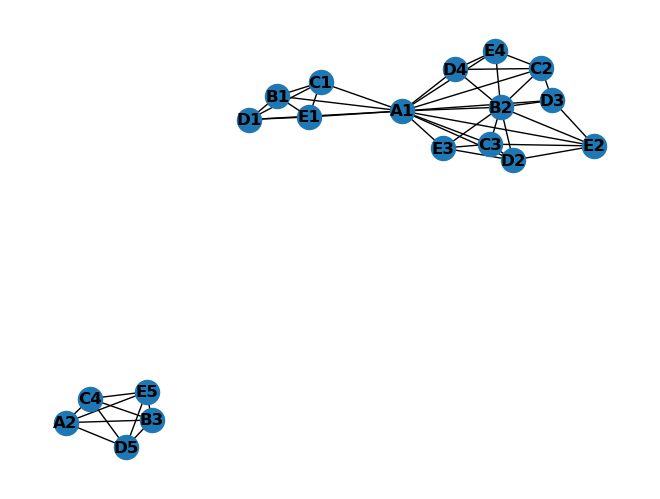

In [36]:
# example 7.3.2024
import random
'''
PROMT
G = nx.Graph()
G.add_nodes_from(['A1', 'A2', 'B1', 'B2', 'B3', 'C1', 'C2', 'C3', 'C4', 'D1', 'D2', 'D3', 'D4','D5','E1','E2','E3','E4','E5'])
G.add_edges_from([
    ('A1', 'B1'), ('A1', 'B2'), ('A1', 'C1'), ('A1', 'C2'), ('A1', 'C3'), ('B1', 'C1'),
    ('B2', 'C2'), ('B2', 'C3'),
    ('A2', 'C4'), ('A2', 'B3'), ('B3', 'C4')

])

Please add connections for

A2-D5 
A2-E5
B3-D5
B3-E5
C4-E5
C4-D5

A1-D1
A1-D2
A1-D3
A1-D4
A1-E1
A1-E2
A1-E3
A1-E4

B1-D1
B1-E1

B2-D2
B2-D3
B2-D4
B2-E2
B2-E3
B2-E4

C3-D2
C3-E2
C3-E3

C2-D3
C2-D4
C2-E4

D2-E3
D2-E2

D3-E2
D4-E4
'''

import networkx as nx

#TODO evtl nochmal schauen ob alles unter B2 stimmt eigentlich

G = nx.Graph()
G.add_nodes_from(['A1', 'A2', 'B1', 'B2', 'B3', 'C1', 'C2', 'C3', 'C4', 'D1', 'D2', 'D3', 'D4', 'D5', 'E1', 'E2', 'E3', 'E4', 'E5'])
G.add_edges_from([
    ('A1', 'B1'), ('A1', 'B2'), ('A1', 'C1'), ('A1', 'C2'), ('A1', 'C3'), ('B1', 'C1'),
    ('B2', 'C2'), ('B2', 'C3'),
    ('A2', 'C4'), ('A2', 'B3'), ('B3', 'C4'),
    ('A2', 'D5'), ('A2', 'E5'), ('B3', 'D5'), ('B3', 'E5'), ('C4', 'E5'), ('C4', 'D5'),
    ('A1', 'D1'), ('A1', 'D2'), ('A1', 'D3'), ('A1', 'D4'), ('A1', 'E1'), ('A1', 'E2'), ('A1', 'E3'), ('A1', 'E4'),
    ('B1', 'D1'), ('B1', 'E1'),
    ('B2', 'D2'), ('B2', 'D3'), ('B2', 'D4'), ('B2', 'E2'), ('B2', 'E3'), ('B2', 'E4'),
    ('C3', 'D2'), ('C3', 'E2'), ('C3', 'E3'),
    ('C2', 'D3'), ('C2', 'D4'), ('C2', 'E4'),
    ('D2', 'E3'), ('D2', 'E2'),
    ('D3', 'E2'), ('D4', 'E4'),('D5','E5'),("C1",'D1'),('C1','E1'),('D1','E1')
])

# Add random weights to all edges
for u, v in G.edges():
    G[u][v]['weight'] = round(random.uniform(0.1, 1.0), 3)

# print graph
nx.draw(G, with_labels=True, font_weight='bold')
plt.show()


Sorted Cliques:
[('A1', 'B2', 'D3', 'E2'), ('A1', 'B2', 'D3', 'C2'), ('A1', 'C1', 'B1', 'D1', 'E1'), ('A1', 'B2', 'D4', 'E4', 'C2'), ('B3', 'E5', 'C4', 'D5', 'A2')]
Selected Cliques:
[('A1', 'B2', 'D3', 'E2'), ('B3', 'E5', 'C4', 'D5', 'A2')]
Added edge between A1B2D3E2 and B1
Added edge between A1B2D3E2 and C1
Added edge between A1B2D3E2 and C2
Added edge between A1B2D3E2 and C3
Added edge between A1B2D3E2 and D1
Added edge between A1B2D3E2 and D2
Added edge between A1B2D3E2 and D4
Added edge between A1B2D3E2 and E1
Added edge between A1B2D3E2 and E3
Added edge between A1B2D3E2 and E4
Added edge between A1B2D3E2 and C2
Added edge between A1B2D3E2 and C3
Added edge between A1B2D3E2 and D2
Added edge between A1B2D3E2 and D4
Added edge between A1B2D3E2 and E3
Added edge between A1B2D3E2 and E4
Added edge between A1B2D3E2 and C2
Added edge between A1B2D3E2 and C3
Added edge between A1B2D3E2 and D2
New graph nodes: ['B1', 'C1', 'C2', 'C3', 'D1', 'D2', 'D4', 'E1', 'E3', 'E4', 'A1B2D3E2', 'B3

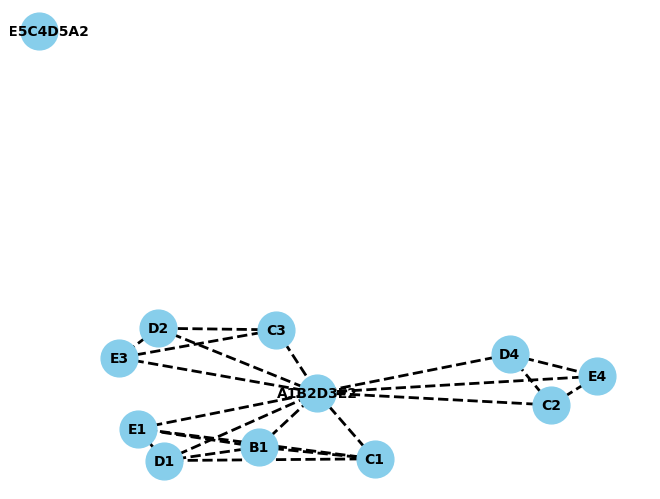

In [4]:
# Find cliques with Jaccardian similarity higher than 0.9
cliques = [clique for clique in nx.find_cliques(G) if all(G[u][v]['weight'] > 0.2 for u, v in nx.utils.pairwise(clique))]

# Calculate average Jaccardian value for each clique
avg_jaccard_values = {}
for clique in cliques:
    total_jaccard_value = sum(G[u][v]['weight'] for u, v in nx.utils.pairwise(clique))
    avg_jaccard_value = total_jaccard_value / len(clique)
    avg_jaccard_values[tuple(clique)] = avg_jaccard_value

# Sort cliques by average Jaccardian value in descending order
sorted_cliques = sorted(avg_jaccard_values.keys(), key=lambda x: avg_jaccard_values[x], reverse=True)
print("Sorted Cliques:")
print(sorted_cliques)
# Keep track of assigned nodes
assigned_nodes = set()

# remove all cliques that have nodes that are already assigned
selected_cliques = []
for clique in sorted_cliques:
    if not assigned_nodes.intersection(clique):
        selected_cliques.append(clique)
        assigned_nodes.update(clique)


print("Selected Cliques:")
print(selected_cliques)

# create copy of graph G
new_graph = G.copy()
# iterate all cliques
for clique in selected_cliques:
    # create a new node for the clique
    new_node = ''.join(clique)
    # add the new node to the new graph
    new_graph.add_node(new_node)
    # remove the old nodes from the new graph
    new_graph.remove_nodes_from(clique)
    # add edges between the new clique and the old nodes each clique member was connected to
    for node in clique:
        for neighbor in G.neighbors(node):
            if neighbor not in clique and neighbor in new_graph.nodes():
                new_graph.add_edge(new_node, neighbor)
                print("Added edge between", new_node, "and", neighbor)




# print the new graph
print("New graph nodes:", new_graph.nodes())
# draw the new graph
pos = nx.spring_layout(new_graph)  # positions for all nodes
nx.draw(new_graph, pos, with_labels=True, node_size=700, node_color="skyblue", font_size=10, font_weight="bold", edge_color="black", width=2, style="dashed")



In [40]:
from treelib import Node, Tree
import networkx as nx

def is_complete_graph(G):
    """
    Check if a graph is complete.

    Parameters:
    - G: NetworkX graph

    Returns:
    - True if the graph is complete, False otherwise
    """
    for node in G:
        if len(G[node]) != len(G) - 1:
            return False
    return True

def is_same_connections(graph, node1, node2):
    """
    Checks if two nodes have the same connections in a graph.
    
    Parameters:
    - graph: NetworkX graph
    - node1: node identifier
    - node2: node identifier
    
    Returns:
    - bool: True if nodes have the same connections, False otherwise
    """
    try:
        return (graph.neighbors(node1)) == set(graph.neighbors(node2))
    except:
        return False

def all_connection_similar_but_to_each_other(graph, node1, node2):
    """
    Checks if two nodes have the same connections in a graph but are not connected to each other.

    Parameters:
    - graph: NetworkX graph
    - node1: node identifier
    - node2: node identifier

    Returns:
    - bool: True if nodes have the same connections but are not connected to each other, False otherwise
    """
    try:
        set1 = set(graph.neighbors(node1))
        set2 = set(graph.neighbors(node2))

        if node2 in set1:
            set1.remove(node2)
        if node1 in set2:
            set2.remove(node1)

        return set1 == set2
    except Exception as e:
        print(f"An error occurred: {e}")
        return False

def find_complete_subgraphs_in_connted_graph(G, current_graph, tree, last_node=None, number_splits=None):
    """
    Creates a tree of complete subgraphs of a connected graph
    Please make sure to only insert connected graphs into this function
    
    Parameters:
    - G: NetworkX graph
    - current_graph: list of nodes
    - tree: treelib Tree
    - last_node: last node added to the tree
    
    Returns:
    - None
    """
    # for the first run it is different because it is the root of the tree -> no node before
    
    # i need a list here to have it the same object in every recursion
    print("current tree", tree.nodes)
    if number_splits is None:
        number_splits = []
        number_splits.append(0)
    number_splits[0] = number_splits[0] + 2
    print("number_splits", number_splits[0])
    if last_node is None:
        if is_complete_graph(G.subgraph(current_graph)):
            name = ''.join(current_graph)
            tree.create_node(name + "(" + str(number_splits[0]) + ")", name+ "(" + str(number_splits[0]) + ")")
            print("complete graph", name)
        else:
            # check how many most connected nodes there are
            most_connected_nodes = [max(current_graph, key=lambda x: len(G[x]))]
            for node in current_graph:
                if len(G[node]) == len(G[most_connected_nodes[0]]):
                    most_connected_nodes.append(node)
            if len(most_connected_nodes) > 1:
                print("case more than one most connected node")
                # create artifical root node
                tree.create_node("root", "root")
                for node in most_connected_nodes:
                    most_connected_node = node
                    print("most connected node", most_connected_node)
                    edited_graph = G.copy()
                    for node in most_connected_nodes:
                        if node != most_connected_node:
                            edited_graph.remove_node(node)
                    # remove all nodes that are not connected to the most connected node
                    for node in current_graph:
                        if not all_connection_similar_but_to_each_other(edited_graph, most_connected_node, node):
                            edited_graph.remove_node(node)
                    # most connected node is saved for the next steps to add to this root node in the tree
                    last_node = str(most_connected_node) + "(" + str(number_splits[0]) + ")"
                    edited_graph.remove_node(most_connected_node)
                    tree.create_node(most_connected_node+ "(" + str(number_splits[0]) + ")", most_connected_node+ "(" + str(number_splits[0]) + ")", parent="root")
                    for current_subgraph in nx.connected_components(edited_graph):
                        # check if subgraph has most connected node
                        find_complete_subgraphs_in_connted_graph(G, current_subgraph, tree, last_node, number_splits)
            else:
                print("case one most connected node")
                most_connected_node = most_connected_nodes[0]
                print("most connected node", most_connected_node)
                tree.create_node(most_connected_node+ "(" + str(number_splits[0]) + ")", most_connected_node+ "(" + str(number_splits[0]) + ")")
                last_node = tree.get_node(most_connected_node + "(" + str(number_splits[0]) + ")")
                edited_graph = G.copy()
                edited_graph.remove_node(most_connected_node)
                for current_subgraph in nx.connected_components(edited_graph):
                    find_complete_subgraphs_in_connted_graph(G, current_subgraph, tree, last_node, number_splits)
    # for every other case it is the same because there is a node before which the node can be attached to
    else:
        if is_complete_graph(G.subgraph(current_graph)):
            name = ''.join(current_graph)
            tree.create_node(name+ "(" + str(number_splits[0]) + ")", name+ "(" + str(number_splits[0]) + ")", parent=last_node)
            print("complete graph", name)
        else:
            # check how many most connected nodes there are
            most_connected_nodes = [max(current_graph, key=lambda x: len(G[x]))]
            for node in current_graph:
                if len(G[node]) == len(G[most_connected_nodes[0]]):
                    most_connected_nodes.append(node)
            if len(most_connected_nodes) > 1:
                print("case more than one most connected node")
                for node in most_connected_nodes:
                    most_connected_node = node
                    print("most connected node", most_connected_node)
                    edited_graph = G.subgraph(current_graph).copy()
                    for node in most_connected_nodes:
                        if node != most_connected_node:
                            edited_graph.remove_node(node)
                    # remove all nodes that are not connected to the most connected node
                    for node in current_graph:
                        if not all_connection_similar_but_to_each_other(edited_graph, most_connected_node, node):
                            edited_graph.remove_node(node)
                    # most connected node is saved for the next steps to add to this root node in the tree
                    tree.create_node(most_connected_node+ "(" + str(number_splits[0]) + ")", most_connected_node+ "(" + str(number_splits[0]) + ")", parent=last_node)
                    last_node = tree.get_node(most_connected_node+ "(" + str(number_splits[0]) + ")")
                    edited_graph.remove_node(most_connected_node)
                    for current_subgraph in nx.connected_components(edited_graph):
                        find_complete_subgraphs_in_connted_graph(G, current_subgraph, tree, last_node, number_splits)
            else:
                print("case one most connected node")
                most_connected_node = most_connected_nodes[0]
                print("most connected node", most_connected_node)
                tree.create_node(most_connected_node+ "(" + str(number_splits[0]) + ")", most_connected_node+ "(" + str(number_splits[0]) + ")", parent=last_node)
                last_node = tree.get_node(most_connected_node + "(" + str(number_splits[0]) + ")")
                edited_graph = G.subgraph(current_graph).copy()
                edited_graph.remove_node(most_connected_node)
                for current_subgraph in nx.connected_components(edited_graph):
                    find_complete_subgraphs_in_connted_graph(G, current_subgraph, tree, last_node, number_splits)
    return

trees = []
for g in nx.connected_components(G):
    tree = Tree()
    graph = G.subgraph(g)
    find_complete_subgraphs_in_connted_graph(graph, graph, tree)
    trees.append(tree)

# Print all trees
for tree in trees:
    tree.show()
    print("---")

current tree {}
number_splits 2
case more than one most connected node
most connected node A1
current tree {'root': Node(tag=root, identifier=root, data=None), 'A1(2)': Node(tag=A1(2), identifier=A1(2), data=None)}
number_splits 4
complete graph E4
most connected node A1
current tree {'root': Node(tag=root, identifier=root, data=None), 'A1(2)': Node(tag=A1(2), identifier=A1(2), data=None), 'E4(4)': Node(tag=E4(4), identifier=E4(4), data=None), 'A1(4)': Node(tag=A1(4), identifier=A1(4), data=None)}
number_splits 6
complete graph E4
current tree {}
number_splits 2
complete graph B3D5A2E5C4
root
├── A1(2)
│   └── E4(4)
└── A1(4)
    └── E4(6)

---
B3D5A2E5C4(2)

---


A1
['A1', 'C1B1E1D1', 'B2', 'C3', 'D2', 'E3', 'C2', 'D3E2', 'D4E4']
[('A1', 'C1B1E1D1'), ('A1', 'B2'), ('B2', 'C3'), ('C3', 'D2'), ('D2', 'E3'), ('D2', 'C2'), ('C2', 'D3E2'), ('C2', 'D4E4')]
---
['B3D5A2E5C4']
[]
---


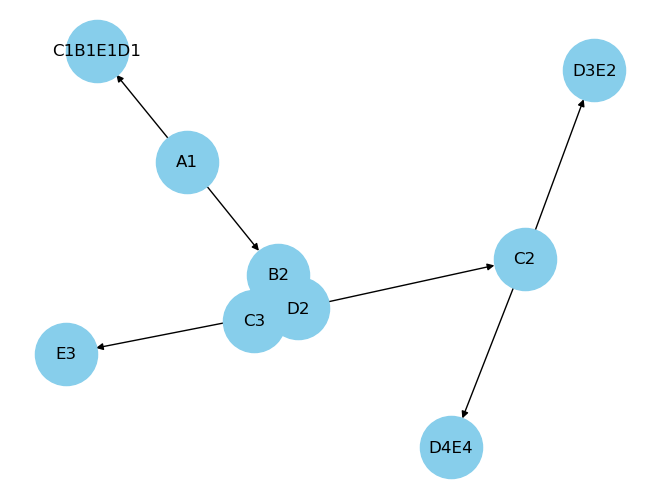

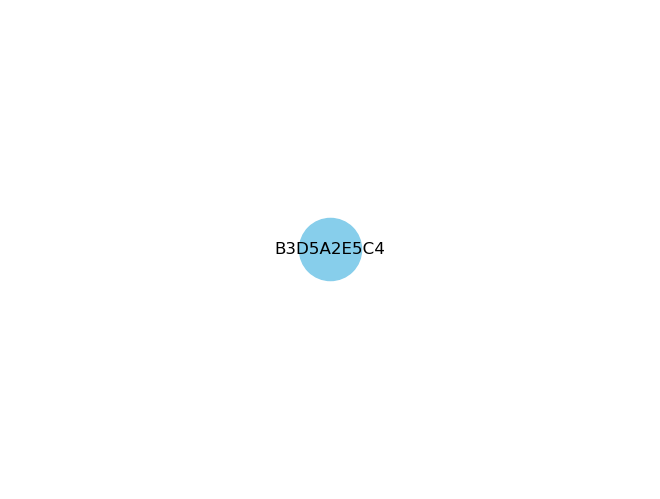

In [6]:


def is_complete_graph(G):
    """
    Check if a graph is complete.

    Parameters:
    - G: NetworkX graph

    Returns:
    - True if the graph is complete, False otherwise
    """
    for node in G:
        if len(G[node]) != len(G) - 1:
            return False
    return True

def is_same_connections(graph, node1, node2):
    """
    Checks if two nodes have the same connections in a graph.
    
    Parameters:
    - graph: NetworkX graph
    - node1: node identifier
    - node2: node identifier
    
    Returns:
    - bool: True if nodes have the same connections, False otherwise
    """
    return (graph.neighbors(node1)) == set(graph.neighbors(node2))


def find_complete_subgraphs_in_connted_graph(G, current_graph, tree, last_node = 0):
    """
    Creates a tree of complete subgraphs of a connected graph
    Please make sure to only insert connected graphs into this function
    
    Parameters:
    - G: NetworkX graph
    - current_graph: list of nodes
    - tree: NetworkX DiGraph
    - last_node: last node added to the tree
    
    Returns:
    - None
    """


    # for the first run it is different because it is the root of the tree -> no node before
    if last_node == 0:
        if is_complete_graph(G.subgraph(current_graph)):
            try:
                name = ''.join(current_graph)
                tree.add_node(name)
            except:
                # if number for example
                name = str(current_graph)
                tree.add_node(name)


        else:
            most_connected_node = max(current_graph, key=lambda x: len(G[x]))
            print(most_connected_node)
            edited_graph = G.copy()
            tree.add_node(most_connected_node)
            #most connected node is safed for the next steps to add to this root node in the tree
            last_node = most_connected_node
            edited_graph.remove_node(most_connected_node)
            for current_subgraph in nx.connected_components(edited_graph):
                find_complete_subgraphs_in_connted_graph(G, current_subgraph, tree, last_node)
    # for every other case it is the same because there is a nodde before which the node can be attached to 
    else:
        if is_complete_graph(G.subgraph(current_graph)):
            try:
                # name is combination of all the nodes in the complete subgraph and is added to the last node
                name = ''.join(current_graph)
                tree.add_node(name)
                tree.add_edge(last_node, name)
            except:
                name = str(current_graph)
                tree.add_node(name)
                tree.add_edge(last_node, name)

        else:
            most_connected_node = max(current_graph, key=lambda x: len(G[x]))
            edited_graph = G.subgraph(current_graph).copy()
            tree.add_node(most_connected_node)
            tree.add_edge(last_node, most_connected_node)
            # new last node to which the next step will add the nodes
            last_node = most_connected_node
            edited_graph.remove_node(most_connected_node)
            for current_subgraph in nx.connected_components(edited_graph):
                find_complete_subgraphs_in_connted_graph(G, current_subgraph, tree, last_node)
    return
# this looks through all the connected components first
trees = []
for g in nx.connected_components(G):
    tree = nx.DiGraph()
    graph = G.subgraph(g)
    find_complete_subgraphs_in_connted_graph(graph, graph, tree)
    #nx.draw(tree, with_labels=True, node_color='skyblue', node_size=2000, arrows=True)
    # print all trees visually
    print(tree.nodes)
    print(tree.edges)
    print('---')

    trees.append(tree)

for tree in trees:
    nx.draw(tree, with_labels=True, node_color='skyblue', node_size=2000, arrows=True)
    plt.show()
